# Contrôle de l'oscillo (DSO-X Keysight)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
import pyvisa
rm = pyvisa.ResourceManager()
dso=rm.open_resource('dso')

In [3]:
# Check connection
dso.query('*IDN?')

'AGILENT TECHNOLOGIES,DSO-X 3014A,MY51450686,02.00.2011101301\n'

## Récupération de la trace active

In [21]:
channel = 3
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

In [22]:
time_axis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))

In [23]:
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))

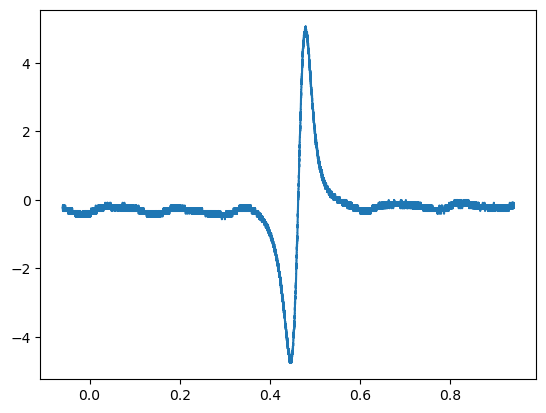

In [24]:
plt.plot(time_axis,data)

# Enregistrer les données

In [ ]:
with h5py.File("oscillo_00.hdf5", "a") as f:
    f.create_dataset("time", data=time_axis)
    f.create_dataset("ch3", data=data)